# GRIP-SPARKS FOUNDATION

# Data Science and Business Analytics Intern

# Author: Santosh Kumar Sirasapalli

# TASK 3: PREDICTION USING DECISION TREE ALGORITHM

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
#Loading the dataset
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [129]:
# dropping unwanted column
df.drop('Id',axis=1,inplace=True) 

# Exploring the data

In [130]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [132]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [133]:
#Data preprocessing-Conversion of Categorical variables into numerical values
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [134]:
Lab_Enc=LabelEncoder()

In [135]:
df.iloc[:,-1]= Lab_Enc.fit_transform(df.iloc[:,-1])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [136]:
df['Species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [137]:
df['Species'].unique()

array([0, 1, 2])

# Spliting the data into independent(X) and dependent variable(y)

In [99]:
X=df.iloc[:,:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [104]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
95,5.7,3.0,4.2,1.2
88,5.6,3.0,4.1,1.3
0,5.1,3.5,1.4,0.2
46,5.1,3.8,1.6,0.2
11,4.8,3.4,1.6,0.2


In [105]:
X_train.shape

(120, 4)

In [106]:
y_train.shape

(120,)

In [109]:
#Building the model-Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [110]:
DecTree= DecisionTreeClassifier()

In [111]:
DecTree.fit(X_train,y_train)

DecisionTreeClassifier()

# Comparing Predicted & Actual Output

In [112]:
#Predicted output
y_pred= DecTree.predict(X_test)
y_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

In [113]:
#Actual output
y_test= np.array(y_test)
y_test

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2])

In [114]:
# Calculation of accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9333333333333333

In [115]:
#Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [116]:
confusion_matrix(y_pred,y_test)

array([[ 8,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  9]])

<AxesSubplot:>

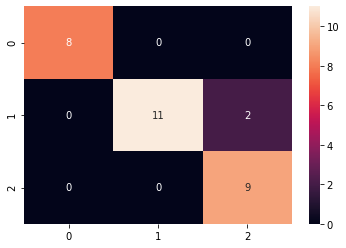

In [117]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [118]:
#Classification Report
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.85      0.92        13
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



# Decision Tree model visualization

In [120]:
from sklearn import tree

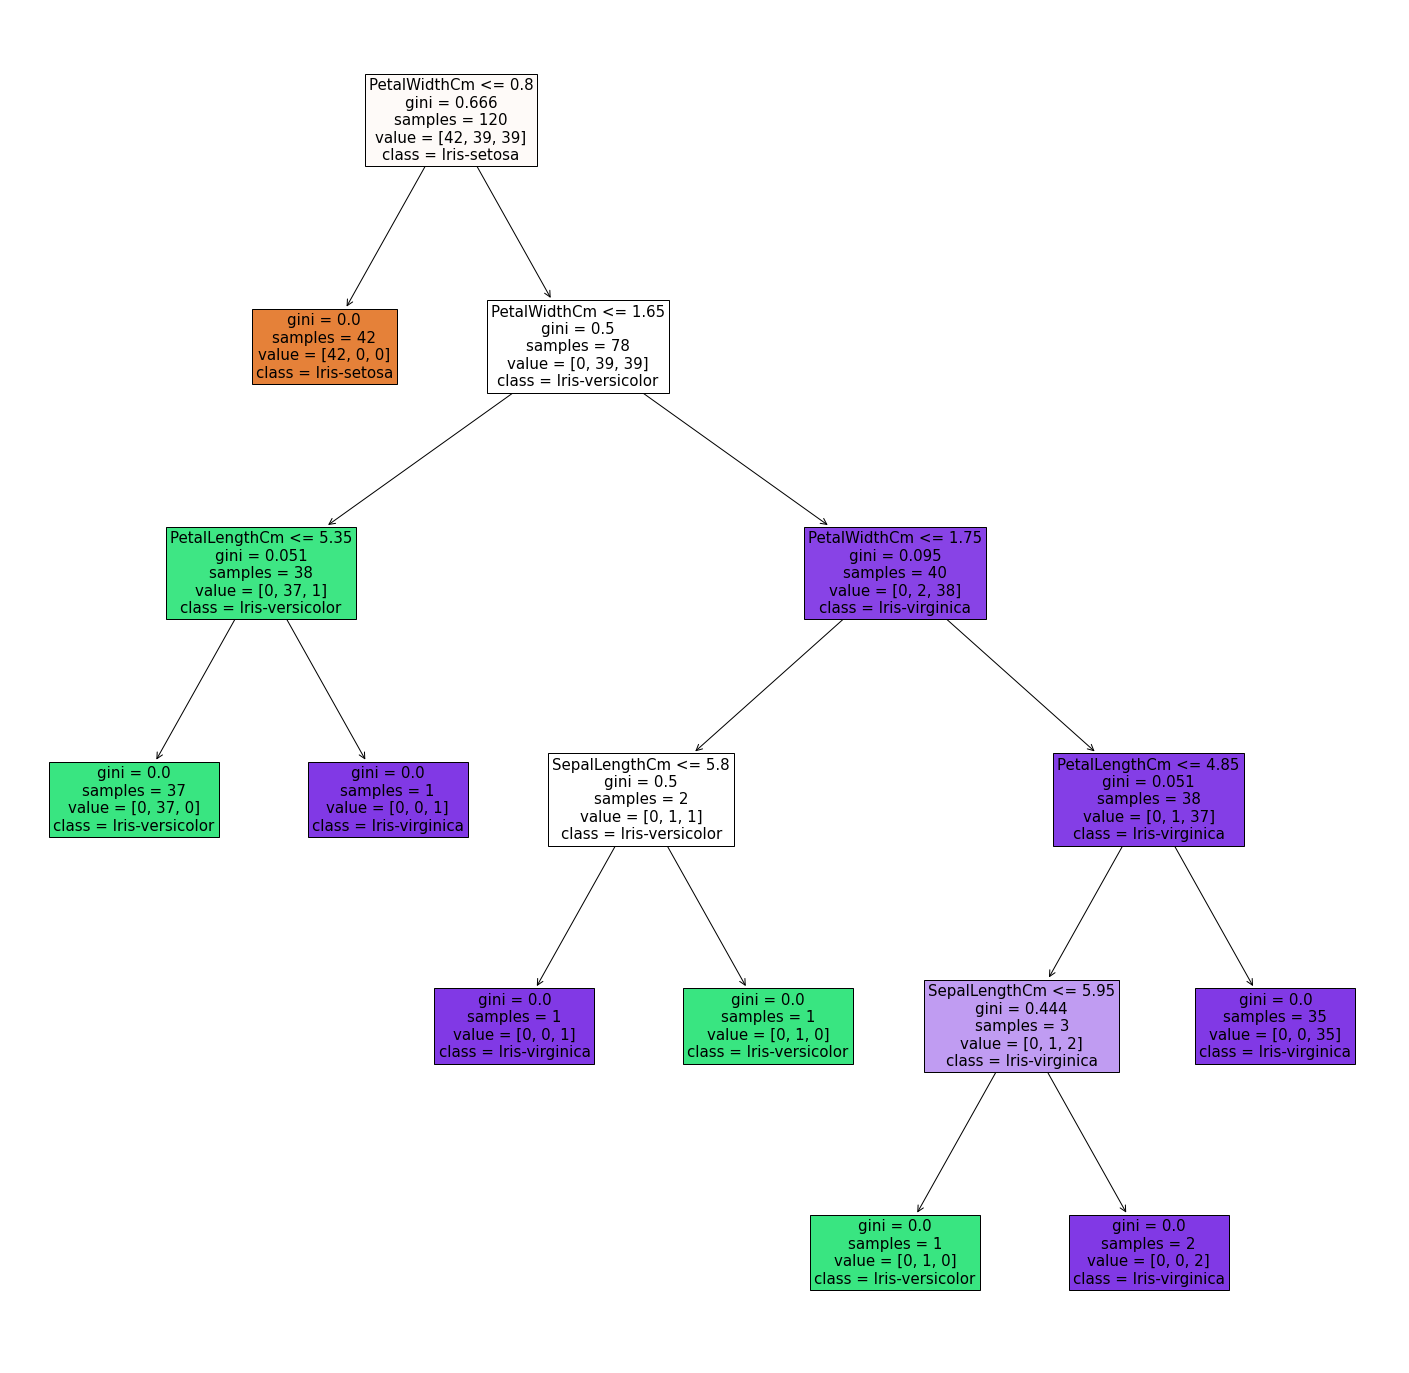

In [141]:
plt.figure(figsize=(25,25))
clas=['Iris-setosa','Iris-versicolor','Iris-virginica']
data_viz= tree.plot_tree(DecTree,feature_names=X.columns,class_names=clas, filled=True,fontsize=15)

In [122]:
#Prediction of species using a random set of values
new_x=[[2.1,6.4,2.3,3.1]]

In [123]:
pred=DecTree.predict(new_x)
pred

array([1])

In [ ]:
#array 1 indicates its Iris-versicolor as Petal length(2.3)<=5.35